In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('cleaned_1.xlsx')

In [4]:
likes = df['likes']
views = df['views']

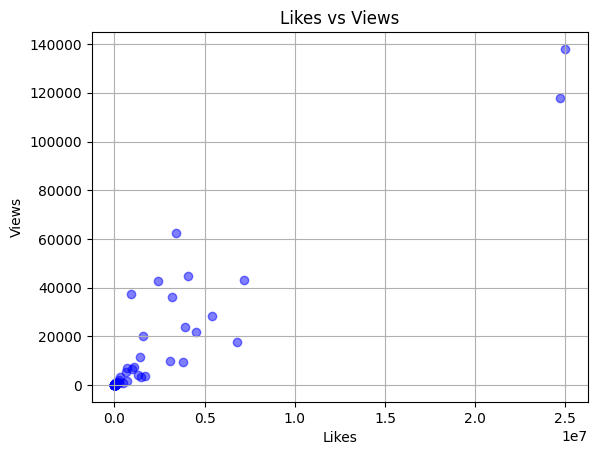

In [5]:
plt.scatter(views, likes, color='blue', alpha=0.5)  # 'alpha' for transparency
plt.xlabel('Likes')
plt.ylabel('Views')
plt.title('Likes vs Views')
plt.grid(True)
plt.show()

In [6]:
views_by_trend = df.groupby('trend')['views'].mean()

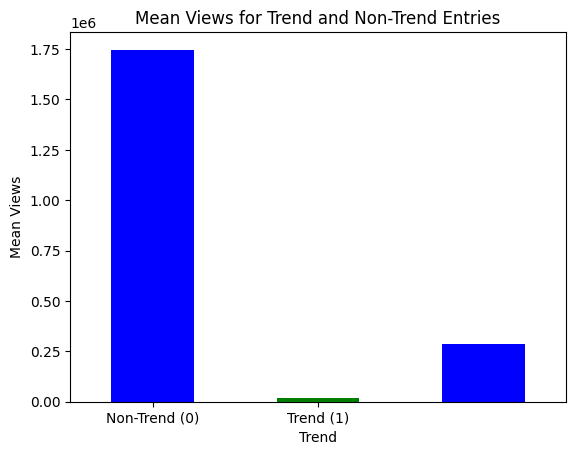

In [7]:
views_by_trend.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Trend')
plt.ylabel('Mean Views')
plt.title('Mean Views for Trend and Non-Trend Entries')
plt.xticks([0, 1], ['Non-Trend (0)', 'Trend (1)'], rotation=0)
plt.show()

In [8]:
views_by_informative = df.groupby('informative')['views'].mean()

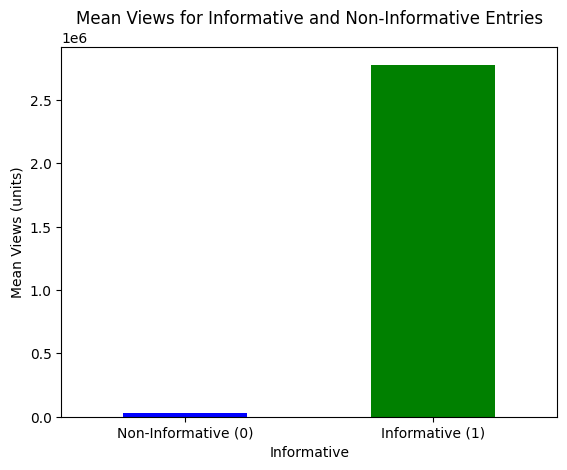

In [9]:
views_by_informative.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Informative')
plt.ylabel('Mean Views (units)')
plt.title('Mean Views for Informative and Non-Informative Entries')
plt.xticks([0, 1], ['Non-Informative (0)', 'Informative (1)'], rotation=0)
plt.show()

In [10]:
df['trend_informative'] = df['trend'].astype(str) + '_' + df['informative'].astype(str)

In [11]:
print("Unique combinations of trend and informative:")
print(df['trend_informative'].unique())

Unique combinations of trend and informative:
['no_yes' 'yes_no' 'yes_yes' 'no_no' 'no _yes']


In [12]:
print("\nBefore mapping:")
print(df[['trend', 'informative', 'trend_informative']].head())


Before mapping:
  trend informative trend_informative
0    no         yes            no_yes
1   yes          no            yes_no
2   yes         yes           yes_yes
3   yes          no            yes_no
4    no         yes            no_yes


In [13]:
mapping = {
    'yes_yes': '11',
    'yes_no': '10',
    'no_yes': '01',
    'no_no': '00'
}

In [14]:
df['trend_informative'] = df['trend_informative'].map(mapping)

In [15]:
print("\nAfter mapping:")
print(df[['trend', 'informative', 'trend_informative']].head())


After mapping:
  trend informative trend_informative
0    no         yes                01
1   yes          no                10
2   yes         yes                11
3   yes          no                10
4    no         yes                01


In [16]:
views_by_combination = df.groupby('trend_informative')['views'].mean().sort_values(ascending=False)

In [17]:
print("\nMean views by trend_informative combination:")
print(views_by_combination)


Mean views by trend_informative combination:
trend_informative
01    2.853740e+06
11    2.800000e+06
00    4.035533e+04
10    7.524444e+03
Name: views, dtype: float64


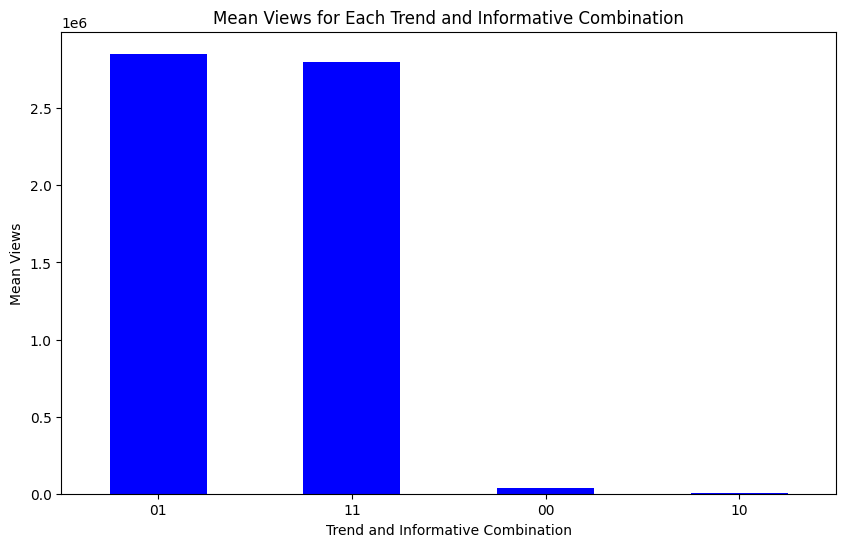

In [18]:
if views_by_combination.empty:
    print("No data available for the given combinations.")
else:
    # Plotting a bar plot to compare mean views for each combination of 'trend' and 'informative'
    views_by_combination.plot(kind='bar', color='blue', figsize=(10, 6))
    plt.xlabel('Trend and Informative Combination')
    plt.ylabel('Mean Views')
    plt.title('Mean Views for Each Trend and Informative Combination')
    plt.xticks(rotation=0)  # Keeps the labels straight
    plt.show()

In [19]:
combinations = ['11', '10', '01', '00']
titles = {
    '11': 'Yes and Yes',
    '10': 'Yes and No',
    '01': 'No and Yes',
    '00': 'No and No'
}

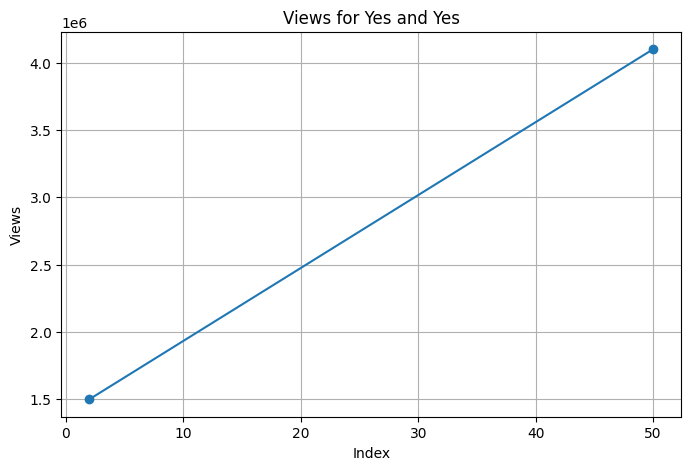

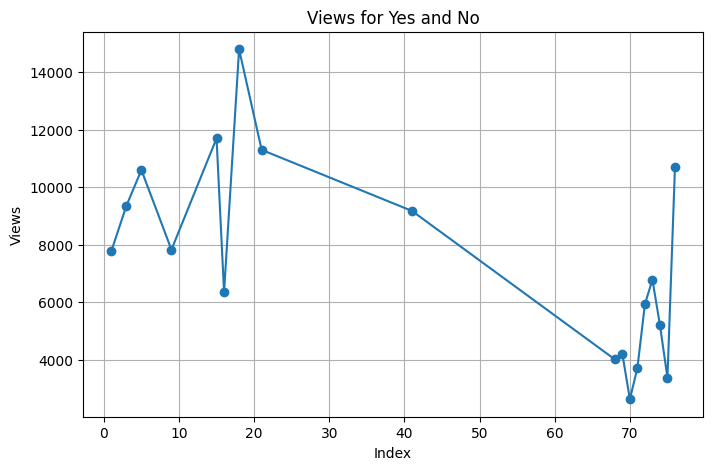

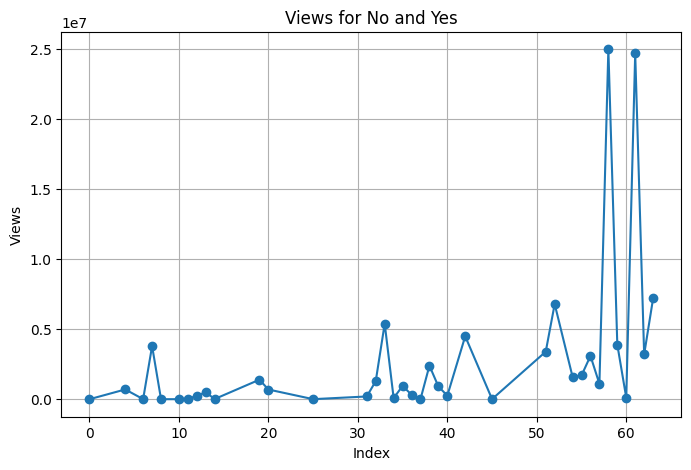

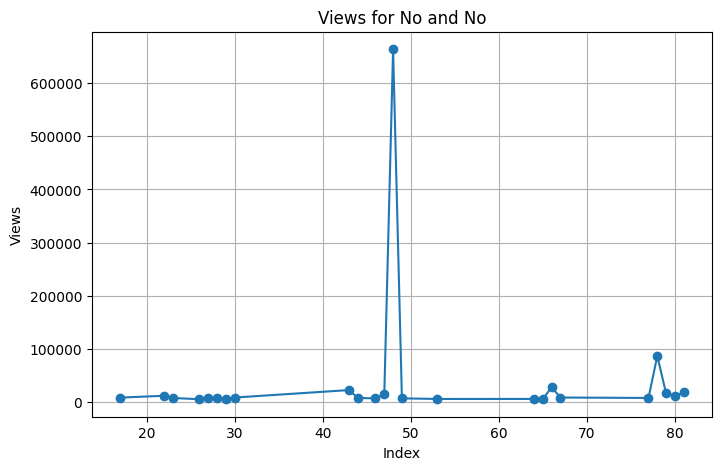

In [20]:
for combination in combinations:
    subset = df[df['trend_informative'] == combination]
    
    # Check if subset is not empty
    if not subset.empty:
        plt.figure(figsize=(8, 5))
        plt.plot(subset.index, subset['views'], marker='o', linestyle='-')
        plt.title(f'Views for {titles[combination]}')
        plt.xlabel('Index')
        plt.ylabel('Views')
        plt.grid(True)
        plt.show()
    else:
        print(f"No data available for combination: {titles[combination]}")

In [21]:
hashtags_df = df['hashtags'].str.split(expand=True).stack().reset_index(level=1, drop=True).to_frame('hashtag')


In [22]:
df_hashtags = df.join(hashtags_df)

In [23]:
hashtag_views = df_hashtags.groupby('hashtag')['views'].sum().reset_index()


In [24]:
top_hashtag = hashtag_views.sort_values(by='views', ascending=False).iloc[0]

In [25]:
print("The best-performing hashtag is:", top_hashtag['hashtag'])
print("Total views with this hashtag:", top_hashtag['views'])

The best-performing hashtag is: #youvah
Total views with this hashtag: 94284607


In [26]:
top_hashtags = hashtag_views.sort_values(by='views', ascending=False).head(10)


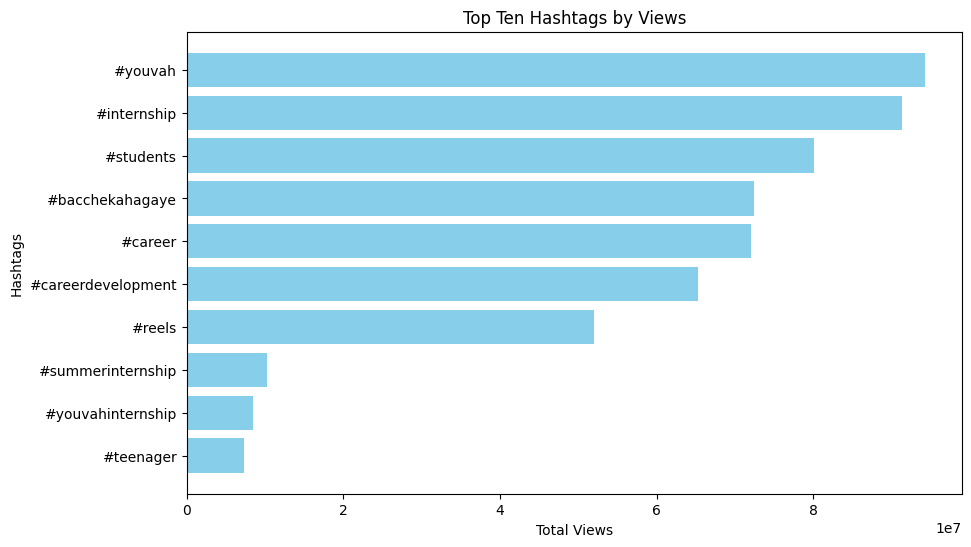

In [27]:
plt.figure(figsize=(10, 6))
plt.barh(top_hashtags['hashtag'], top_hashtags['views'], color='skyblue')
plt.xlabel('Total Views')
plt.ylabel('Hashtags')
plt.title('Top Ten Hashtags by Views')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest views on top
plt.show()

In [28]:
hashtag_counts = df_hashtags['hashtag'].value_counts().reset_index()
hashtag_counts.columns = ['hashtag', 'count']

In [29]:
print("Hashtag counts:")
print(hashtag_counts)

Hashtag counts:
               hashtag  count
0          #internship     36
1              #youvah     35
2               #reels     24
3            #students     22
4      #bacchekahagaye     13
..                 ...    ...
204            #advice      1
205       #TeenInterns      1
206  #EmpoweringTalent      1
207      #SuccessStory      1
208            #indore      1

[209 rows x 2 columns]


In [30]:
top_50_hashtags = hashtag_counts.head(50)

In [31]:
print("Top 50 hashtags used the maximum number of times:")
print(top_50_hashtags)

Top 50 hashtags used the maximum number of times:
                    hashtag  count
0               #internship     36
1                   #youvah     35
2                    #reels     24
3                 #students     22
4           #bacchekahagaye     13
5                #teenagers     11
6          #internshipindia      9
7                   #career      9
8           #reelsinstagram      9
9         #YouvahInternship      6
10       #careerdevelopment      6
11              #highschool      5
12                #teenager      5
13        #youvahinternship      4
14                #trending      4
15       #YouvahInternships      4
16                     #qna      4
17                    #teen      3
18       #youvahinternships      3
19                 #startup      3
20           #YouVahJourney      3
21               #jobsearch      3
22  #YouVahSummerInternship      3
23                   #memes      3
24         #PaidInternships      3
25                  #school      3
26   

In [32]:
total_likes = df['likes'].sum()
total_views = df['views'].sum()

In [33]:
engagement_rate = (total_likes / total_views) * 100

In [34]:
print(f"Engagement Rate based on views and likes: {engagement_rate:.2f}%")

Engagement Rate based on views and likes: 0.65%


In [35]:
df['date_time'] = pd.to_datetime(df['date and time'])

In [37]:
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek  # Monday=0, Sunday=6


In [38]:
views_by_hour = df.groupby('hour')['views'].mean()

In [39]:
views_by_day = df.groupby('day_of_week')['views'].mean()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '3.0'),
  Text(1, 0, '4.0'),
  Text(2, 0, '5.0'),
  Text(3, 0, '7.0'),
  Text(4, 0, '8.0'),
  Text(5, 0, '9.0'),
  Text(6, 0, '10.0'),
  Text(7, 0, '11.0'),
  Text(8, 0, '12.0'),
  Text(9, 0, '13.0'),
  Text(10, 0, '14.0'),
  Text(11, 0, '15.0'),
  Text(12, 0, '16.0'),
  Text(13, 0, '17.0')])

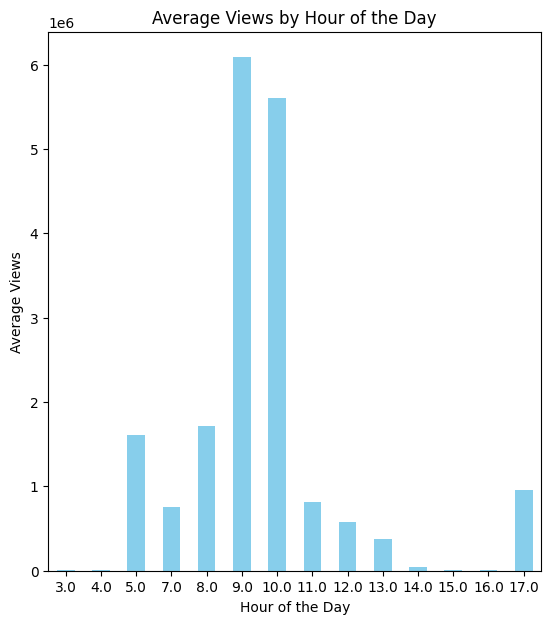

In [43]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
views_by_hour.plot(kind='bar', color='skyblue')
plt.title('Average Views by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Views')
plt.xticks(rotation=0)


([<matplotlib.axis.XTick at 0x218816cb190>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

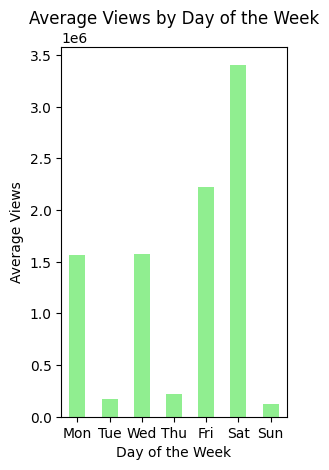

In [44]:
plt.subplot(1, 2, 2)
views_by_day.plot(kind='bar', color='lightgreen')
plt.title('Average Views by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Views')
plt.xticks(rotation=0)
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

In [50]:
print(df.head())

  trend informative    views  likes        date and time  \
0    no         yes     4013    116  2024-05-07T15:07:47   
1   yes          no     7777    168  2024-04-24T11:05:55   
2   yes         yes  1500000   3254  2024-04-18T12:30:31   
3   yes          no     9353    166  2024-04-15T12:22:41   
4    no         yes   703000   1823  2024-04-08T12:23:17   

                                   hashtags trend_informative  \
0  #YouVah #ResumeRefresh #UnlockYourSkills                01   
1                                  #onelove                10   
2            #YouVahSummer #TeenInternships                11   
3           #YouVahSuccess #PaidInternships                10   
4         #YouVahSuccess #InternshipJourney                01   

            date_time  hour  day_of_week        date  
0 2024-05-07 15:07:47  15.0          1.0  2024-05-07  
1 2024-04-24 11:05:55  11.0          2.0  2024-04-24  
2 2024-04-18 12:30:31  12.0          3.0  2024-04-18  
3 2024-04-15 12:22:41  12.0 

In [51]:
df.to_excel('cleaned_4.xlsx', index=False)